# Исследование рынка игр

**Описание проекта** 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


**Описание данных**   
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (от 0 до 100)
- User_Score — оценка пользователей (от 0 до 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.


**План работы**
1. Получение и изучение данных
2. Подготовка данных
3. Проведение исследовательского анализа данных
4. Составление портрета пользователя каждого региона
5. Проведение исследования статистических показателей
6. Проверка гипотез
7. Общий вывод

# Этап 1. Получение данных

##  Импорт библиотек


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Прочитаем файл *games.csv* и сохраним его в переменной *df*.

In [ ]:
df = pd.read_csv('/datasets/games.csv')

Получение первых 10 строк таблицы.

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая информация о данных таблицы *df*.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим полученную информацию подробнее.
Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения. 

# Этап 2. Предобработка данных

Переименуем столбцы, изменим тип некоторых данных,исключим пропуски,а также проверим данные на наличие дубликатов.

Получаем перечень названий столбцов.

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Переименуем столбцы для удобства дальнейшей работы. Проверим результат.

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Изменим тип данных:
- user_score c *object* на *float64*
- year_of_release c *float64* на *int64*

Посмотрим, какие значения может принимать столбец *user_score*.

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков в *user_score* есть значение "tbd". "tbd" значит to be decided, а значит по сути является NaN. Посмотрим на количество данных значений и заменим их на NaN. Затем приведем к типу *float64*.

In [ ]:
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [ ]:
df['user_score']=pd.to_numeric(df['user_score'],errors='coerce')

Прежде чем изменим тип данных у *year_of_release*. Посмотрим на наличие пропусков.

In [ ]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В столбцах *name*, *genre*, *year_of_release* есть пропуски, их количество составляет около 1,6%, так как мы не можем точно заменить эти данные, удалим пропуски.

In [ ]:
df.dropna(subset = ['year_of_release','name','genre'], inplace=True)

Теперь изменим тип *year_of_release* на *int64*.

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


В датасете остались пустые значения в *critic_score*, *user_score*, *rating*. Причины могут быть разные: например, в *critic_score* могут быть пропуски из-за того, что раньше игры не оценивались критиками, так же как и в *rating* могут быть пропуски, так как игры могли быть выпущены раньше, чем появился рейтинг организации ESRB, в *user_score* могут быть пропуски, так как игры не популярны или имеют узкую аудиторию.

Рассмотрим подробнее, какие значения может принимать категориальная переменная *rating*.

In [ ]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Количество пропусков - 6766. Прочитаем подробнее, что значит, каждая категория.

«RP» значит «Рейтинг ожидается». Поэтому мы можем заменить NaN на «RP».

In [ ]:
df['rating']=df['rating'].fillna('RP')

В отличие от *rating*, *critic_score* и *user_score* являются количественными переменными. Посмотрим на числовое описание данных для каждой из колонок, чтобы решить, как мы будем заполнять пропуски.

In [ ]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Данных для того, чтобы восстановить эти пропуски, у нас недостаточно. Также мы видим, что пропуски в столбцах часто встречаются вместе, т.е. нет данных по одним и тем же играм. Это с большой долей вероятности связано с тем, что эти данные просто не были загружены в таблицу.Оставим пропуски и посмотрим на результаты без их заполнения.

Посмотрим сводную информацию о таблице еще раз. И проверим наличие дубликатов.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

Последним шагом добавим столбец с суммарными продажами.

In [ ]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

# Этап 3. Исследовательский анализ

Получение первых 10 строк новой таблицы.

In [ ]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


**1. Продажи игр по годам**

Посмотрим сколько игр выпускалось в разные года.

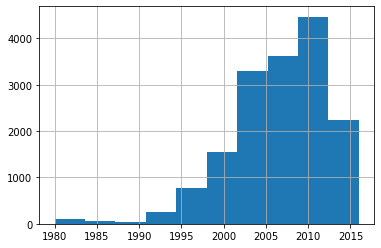

In [ ]:
df['year_of_release'].hist()

До середины 90-х годов игр выпускалось очень мало. Большинство игр выпускалось в 2008-2012 годах. Затем количество выпускаемых игр начало снижаться, это может быть связано с развитием мобильных устройств и появлением новых "развлечений". 

**2. Изменение продаж по платформам**

Определим платформы с наибольшими суммарными продажами.

In [ ]:
platform_sales=df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Платформы с наибольшими суммарными продажами:
- PS2
- X360
- PS3
- Wii
- DS 
- PS    

Построим распределение суммарных продаж по годам для каждой из вышеуказанных платформ.

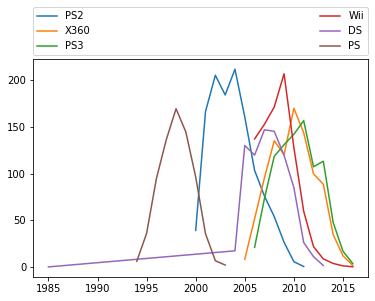

In [ ]:
plt.plot(df.query('platform == "PS2"').groupby('year_of_release')['total_sales'].sum(),label='PS2')
plt.plot(df.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum(),label='X360')
plt.plot(df.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum(),label='PS3')
plt.plot(df.query('platform == "Wii"').groupby('year_of_release')['total_sales'].sum(),label='Wii')
plt.plot(df.query('platform == "DS"').groupby('year_of_release')['total_sales'].sum(),label='DS')
plt.plot(df.query('platform == "PS"').groupby('year_of_release')['total_sales'].sum(),label='PS')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [ ]:
platform_list = ['PS2','X360','PS3','Wii','DS','PS']
platform_list
platform_lifetime=[]
for platform in platform_list:
    lifetime = len(df.loc[df['platform'] == platform,'year_of_release'].unique())
    platform_lifetime.append(lifetime)
print(platform_lifetime, np.mean(platform_lifetime))

[12, 12, 11, 11, 11, 10] 11.166666666666666


Такие платформы, как **PS**, **PS2** и **DS**, которые были на пике в 1995-2006 года, имеют сейчас нулевые продажи. Ориентируясь на вышепредставленный график, можно сделать вывод, что в целом платформы "живут" около 10 лет. По более точным данным, популярные платформы живут 11 лет.

**3. Выбор релевантных данных**

Если посмотреть на данные за все время, некоторые из платформ, которые являются лидерами по продажам, уже устарели, и им на замену пришли новые версии. Возьмем для анализа временной промежуток после 2012 года. В это время уже закончился пиковый период, и были представлены платформы наиболее популярные на данный момент. Исключим данные за предыдущие периоды.  

In [ ]:
df=df[df['year_of_release']>=2012]
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


**4. Выбор лидирующих платформ**

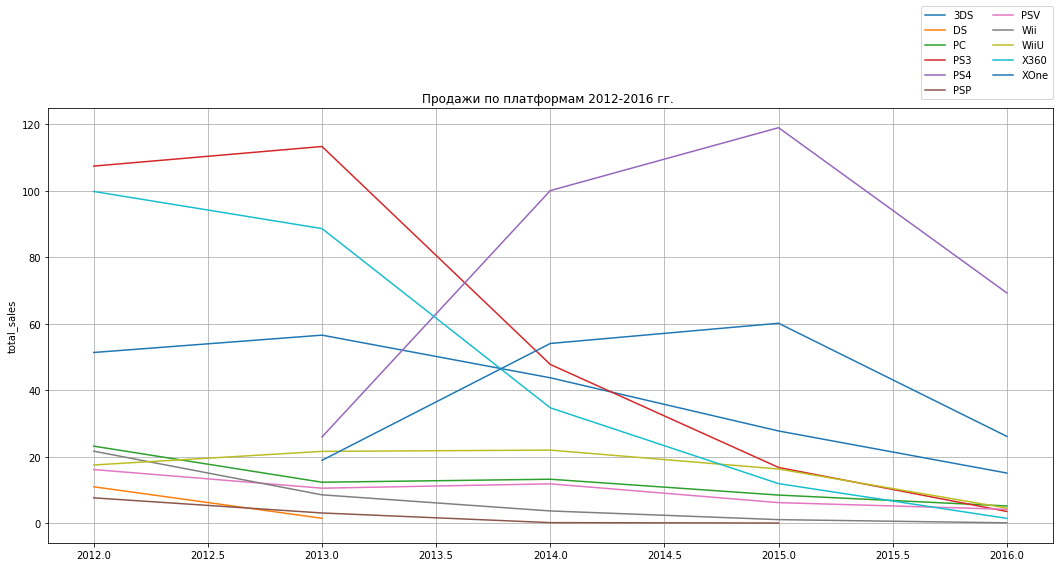

In [ ]:
plt.figure(figsize=(18, 8))
for platform,group_data in df.groupby('platform'):
    plt.plot(df.query('platform == @platform').groupby('year_of_release')['total_sales'].sum(),label=platform)
plt.title("Продажи по платформам 2012-2016 гг. ")
plt.ylabel("total_sales")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=2,  borderaxespad=0.)
plt.grid()

In [ ]:
sales_in_2016 = df.query('year_of_release==2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sales_in_2016

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

В 2016 году лидирующими платформами являются:
- PS4
- XOne
- 3DS

Так же можно еще раз убедиться, что в целом по разным платформам суммарные продажи снижаются.

**5. Глобальные продажи каждой игры**

Построим boxplot по глобальным продажам игр.

(0, 1.1)

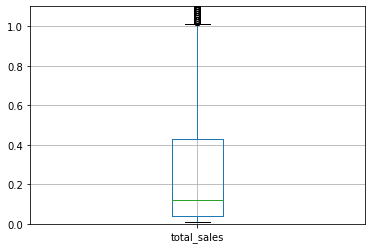

In [ ]:
df.boxplot(column='total_sales')
plt.ylim(0, 1.1)


В среднем медиана продаж игр составляет 0,125 миллиона долларов, максимальные продажи - до 1 млн долларов.

Построим boxplot по лидирующим платформам в 2016 году.

Text(0.5, 1.0, 'WiiU')

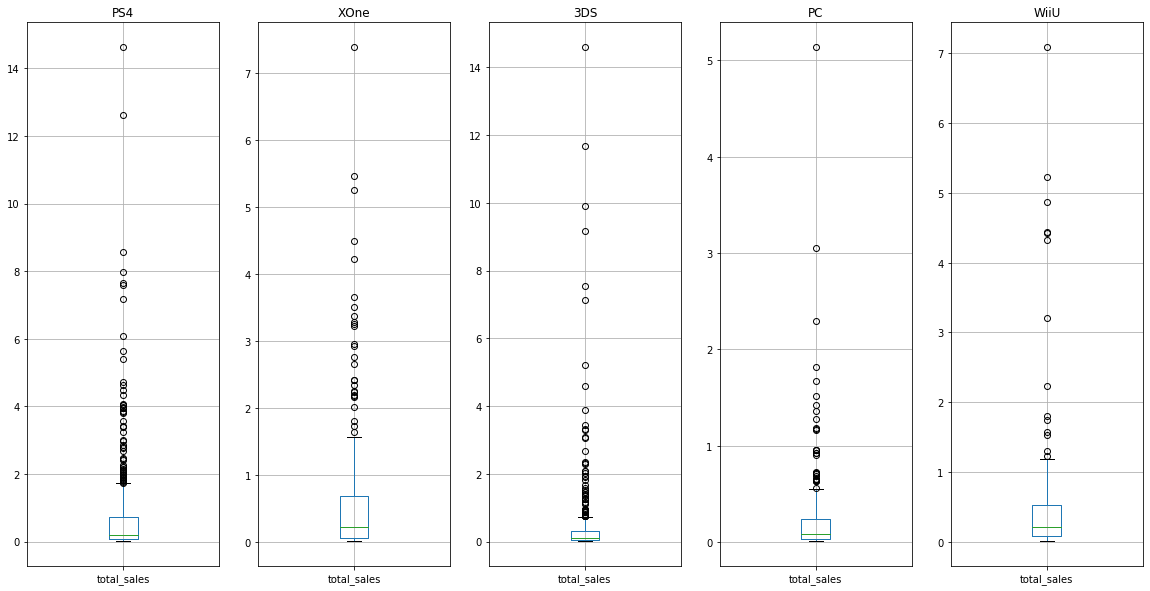

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(151)
df.query('platform == "PS4"').boxplot(column='total_sales')
ax1.set_title('PS4')

ax2 = fig.add_subplot(152)
df.query('platform == "XOne"').boxplot(column='total_sales')
ax2.set_title('XOne')

ax3 = fig.add_subplot(153)
df.query('platform == "3DS"').boxplot(column='total_sales')
ax3.set_title('3DS')

ax4 = fig.add_subplot(154)
df.query('platform == "PC"').boxplot(column='total_sales')
ax4.set_title('PC')

ax5 = fig.add_subplot(155)
df.query('platform == "WiiU"').boxplot(column='total_sales')
ax5.set_title('WiiU')

Посмотрим на boxplotы поближе.

Text(0.5, 1.0, 'WiiU')

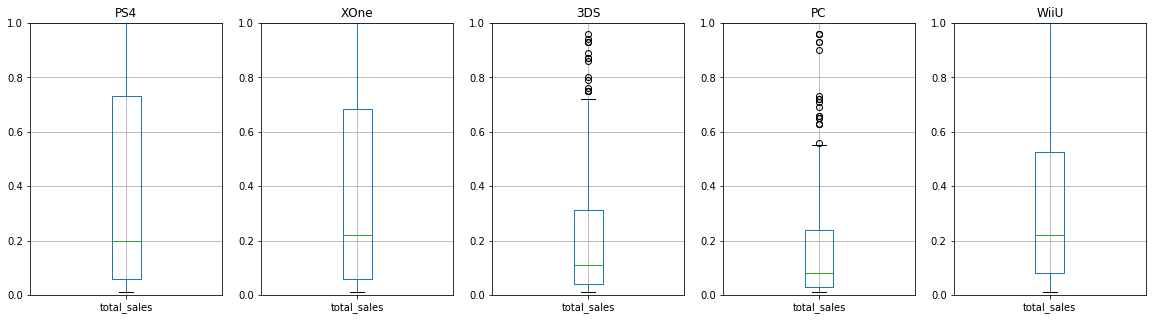

In [ ]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(151)
df.query('platform == "PS4"').boxplot(column='total_sales')
ax1.set_ylim([0, 1])
ax1.set_title('PS4')

ax2 = fig.add_subplot(152)
df.query('platform == "XOne"').boxplot(column='total_sales')
ax2.set_ylim([0, 1])
ax2.set_title('XOne')

ax3 = fig.add_subplot(153)
df.query('platform == "3DS"').boxplot(column='total_sales')
ax3.set_ylim([0, 1])
ax3.set_title('3DS')

ax4 = fig.add_subplot(154)
df.query('platform == "PC"').boxplot(column='total_sales')
ax4.set_ylim([0, 1])
ax4.set_title('PC')

ax5 = fig.add_subplot(155)
df.query('platform == "WiiU"').boxplot(column='total_sales')
ax5.set_ylim([0, 1])
ax5.set_title('WiiU')

В основном на топовых платформам медиана продаж находится около 0,2 млн долларов. Максимальное значение, после которых начинаются выбросы у платформ **PS4** и **X360**  находятся на уровне около 1,7 млн долларов. У платформы **PC** самая маленькая медиана, она меньше 0,1 млн долларов, при этом максимальное значение около 0,6 млн. 

У платформ **PS4** и **X360** продажи очень похожи, скорее всего это вызвано тем, что многие игры выпускаются одновременно на обе платформы. Всё же существует некоторая разница, она может быть следствием эксклюзивных выпусков игр для каждой из платформ. Если говорить о платформе **3DS** И **PC**, графики показывают, что эти платформы уступают по популярности первым двум.

**6. Влияние отзывов на продажи**

Для анализа я решила взять платоформу **PS3**, она достаточно давно на рынке и пока еще жива (на 2016). Её продажи в целом тоже хорошие.

In [ ]:
ps3 = df[df['platform'] == 'PS3']
ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46


**Отзывы пользователей и продажи**

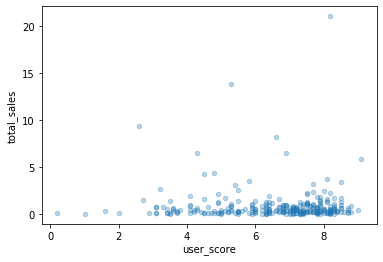

In [ ]:
ps3.plot(x='user_score', y='total_sales', kind='scatter',alpha=0.3)

Исходя из графика связь очень слабая. Посмотрим на коэффициент коррреляции.

In [ ]:
print(ps3['user_score'].corr(ps3['total_sales']))

-0.005143522887113815


Как и ожидалось, мы видим, что связь практически отсутствует, посмотрим, есть ли связь между оценками критиков и продажами.

**Отзывы критиков и продажи**

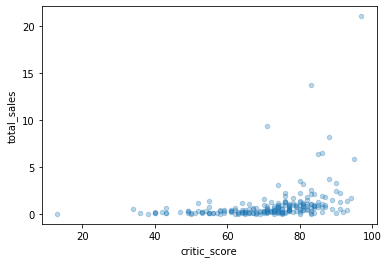

In [ ]:
ps3.plot(x='critic_score', y='total_sales', kind='scatter',alpha=0.3)

С увеличением рейтинга от критиков увеличиваются и суммарные продажи, но свзяь умеренная, не сильная. Посмотрим на коэффициент коррреляции.

In [ ]:
print(ps3['critic_score'].corr(ps3['total_sales']))

0.3314972592629587


Как и ожидалось мы видим положительную связь, однако значение в 0,33 говорят, что связь не сильная.

**Вывод**  
Связь между оценками пользователей и продажами практически отсутствует, умеренная положительная связь наблюдается между оценками критиков и продажами. Скорее всего это связано с тем, что у людей могут быть разные мнения и вкусы в играх, поэтому они ориентируюся больше на себя, чем на отзывы других людей. Однако они могут обратить внимание на оценки экспертов.


**Корреляция на других платформах**

Посмотрим справедливо ли это для других платформ. Возьмем топ 3 платформы в 2016 году, и посмотрим на их коэффициенты корреляции.

- **PS4** 

In [ ]:
ps4 = df[df['platform'] == 'PS4']
print("Коэффициент корреляции между оценками пользователей и продажами:" , ps4['user_score'].corr(ps4['total_sales']))
print("Коэффициент корреляции между оценками критиков и продажами:" ,ps4['critic_score'].corr(ps4['total_sales']))

Коэффициент корреляции между оценками пользователей и продажами: -0.031957110204556424
Коэффициент корреляции между оценками критиков и продажами: 0.40656790206178095


- **XOne**

In [ ]:
xone = df[df['platform'] == 'XOne']
print("Коэффициент корреляции между оценками отзывами пользователей и продажами:" , xone['user_score'].corr(xone['total_sales']))
print("Коэффициент корреляции между оценками критиков и продажами:" ,xone['critic_score'].corr(xone['total_sales']))

Коэффициент корреляции между оценками отзывами пользователей и продажами: -0.06892505328279414
Коэффициент корреляции между оценками критиков и продажами: 0.4169983280084017


- **3DS**

In [ ]:
ds3 = df[df['platform'] == '3DS']
print("Коэффициент корреляции между оценками пользователей и продажами:" , ds3['user_score'].corr(ds3['total_sales']))
print("Коэффициент корреляции между оценками критиков и продажами:" ,ds3['critic_score'].corr(ds3['total_sales']))

Коэффициент корреляции между оценками пользователей и продажами: 0.19758263411038599
Коэффициент корреляции между оценками критиков и продажами: 0.3208028695360785


**Общий вывод о корреляции**  
В целом оценки пользователей практически не имеют связи, либо очень слабую. Связь между оценками критиков, так же остаётся умеренной. Это может быть связано с тем, что игроки при выборе игры в основном полагаются на свои предпочтения, однако мнение критиков может побудить их приобрести игру.

**7. Анализ игр по жанрам**

Отобразим на графике количество игр и суммарные продажи для каждого жанра, сделаем выводы.

Text(0.5, 1.0, 'Количество игр по жанру')

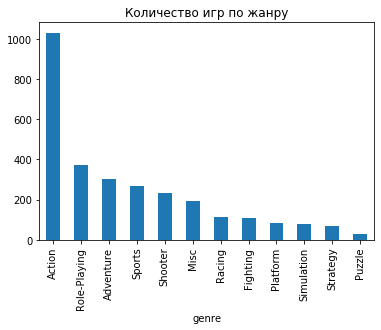

In [ ]:
df.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Количество игр по жанру')

Text(0.5, 1.0, 'Суммарные продажи по жанрам')

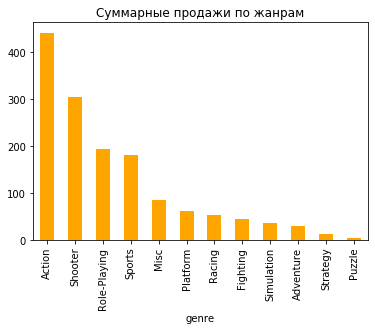

In [ ]:
df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',color='orange')
plt.title('Суммарные продажи по жанрам')

Больше всего игр со следующими жанрами: **Action**, **Sports**, **игры разного жанра**. Меньше всего производится игр с жанрами **Puzzle** и **Strategy**. Самыми прибыльными являются жанры **Action**, **Sports** и **Shooter**.  
При этом жанры **Action** и **Sports** имеют не очень большую разницу в продажах, в то время как количество игр данных жанров отличается почти в 2 раза. **Спортивные игры** выходят по большей части для консолей, в то время как **Action**, могут выходить, как для компьютера, так и для консолей, поэтому спрос на них в целом выше, а значит количество выпускаемых игр тоже. 

# Этап 4. Портрет пользователя по регионам

Проанализируем самые популярные платформы для каждого из регионов.

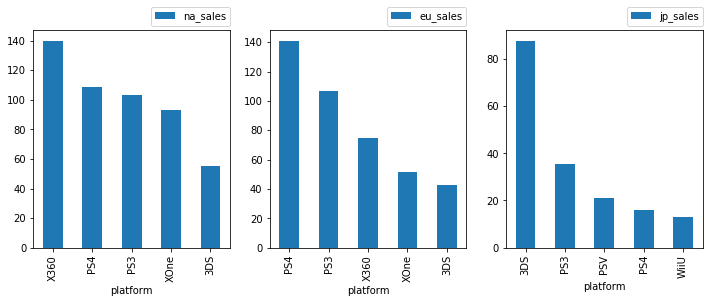

In [ ]:
na_top_platforms = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_top_platforms = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_top_platforms = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
na_top_platforms.head(5).plot.bar()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2,  borderaxespad=0.)

plt.subplot(1, 3, 2)
eu_top_platforms.head(5).plot.bar()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2,  borderaxespad=0.)

plt.subplot(1, 3, 3)
jp_top_platforms.head(5).plot.bar()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2,  borderaxespad=0.)

В **Северной Америке** самыми популярными платформами являются **X360**,  **PS4** , **PS3**.

В **Европе** те же самые платформы являются популярными, однако первое место занимает **PS4** , а **X360** занимает третье. При этом продажи **X360** в **Северной Америке** и **PS4** в **Европе** находятся на одном уровне.

В **Японии** другие платформы пользуются популярностью. Первое место с большим отрывом занимает **3DS**, второе место у **PS3**, a **PSV** занимает 3 место, при этом ее продажи более чем в 2 раза меньше, чем продажи **3DS**.

Проанализируем самые популярные жанры для каждого из регионов.

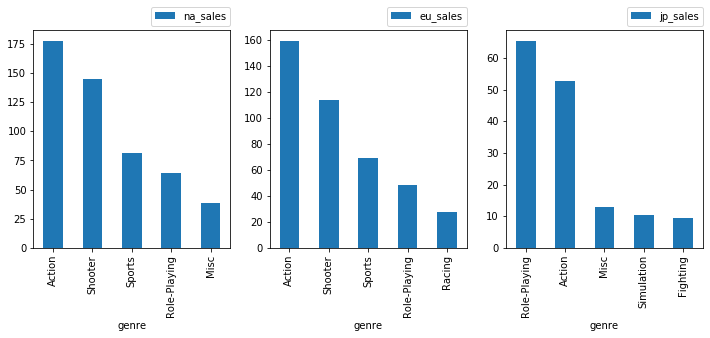

In [ ]:
na_genre=df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_genre=df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_genre=df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
na_genre.head(5).plot.bar()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2,  borderaxespad=0.)

plt.subplot(1, 3, 2)
eu_genre.head(5).plot.bar()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2,  borderaxespad=0.)

plt.subplot(1, 3, 3)
jp_genre.head(5).plot.bar()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2,  borderaxespad=0.)

В **Северной Америке** самыми популярными жанрами являются **Action**,  **Sports** , **Shooter**. В **Европе** ситуация аналогичная. Можно добавить, что в **Северной Америке** также предпочитают игры разного жанра, а в **Европе** гонки.

В **Японии** совершенно другая ситуация, самыми популярными жанрами являются **Role-Playing**,  **Actions** , **игры разного жанра**. Это может быть связано с их менталитетом. 

Проанализируем влияние рейтинга ESRB для каждого из регионов.

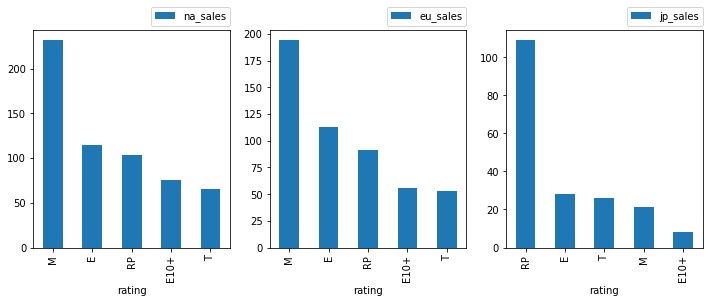

In [ ]:
na_rating=df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_rating=df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_rating=df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
na_rating.plot.bar()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2,  borderaxespad=0.)

plt.subplot(1, 3, 2)
eu_rating.plot.bar()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2,  borderaxespad=0.)

plt.subplot(1, 3, 3)
jp_rating.plot.bar()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2,  borderaxespad=0.)

В **Северной Америке** и **Европе** больше всего покупают игры **"для взрослых"** и игры **"для всех"**. Можно провести связь между популярными жанрами и рейтингом также. Например популярные спортинвые игры чаще всего относятся к категории "для всех", а игры жанра Shooter могут иметь возрастные ограничения из-за содержания.

В **Японии** ситуация другая, большинство покупаемых игр не имеют рейтинга. Это может быть связано с тем, что рейтинг ESRB был создан в **Северной Америке**. В **Японии** люди могут играть в свои игры, которым данный рейтинг не присвоен, либо они на него не ориентируются при выборе игр. Однако следующие 3 места занимают игры с таким же рейтингом как в **Северной Америке** и **Европе** - **"для всех"**, **"для взрослых"** и **"подросткам"**.

# Этап 5. Исследование статистических показателей

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [ ]:
sports = df[df['genre']=='Sports']
racing = df[df['genre']=='Racing']
platform = df[df['genre']=='Platform']
misc = df[df['genre']=='Misc']
simulation = df[df['genre']=='Simulation']
action = df[df['genre']=='Action']
role_playing = df[df['genre']=='Role-Playing']
puzzle = df[df['genre']=='Puzzle']
shooter = df[df['genre']=='Shooter']
fighting = df[df['genre']=='Fighting']
adventure = df[df['genre']=='Adventure']
strategy = df[df['genre']=='Strategy']

Создадим сводную таблицу со статистическими показателями для каждого из жанра.


In [ ]:
df.groupby('genre')[['critic_score', 'user_score']].agg(['mean', 'std', 'var'])

critic_score                        user_score            \
                     mean        std         var       mean       std   
genre                                                                   
Action          71.378440  12.093748  146.258753   6.825048  1.374440   
Adventure       72.661017  11.000956  121.021040   7.466667  1.277652   
Fighting        70.406250  13.407791  179.768849   6.895714  1.431269   
Misc            72.807018  10.054208  101.087093   6.938806  1.257939   
Platform        74.610169  13.713845  188.069550   6.806061  1.654447   
Puzzle          75.444444   6.948221   48.277778   7.633333  0.888819   
Racing          71.864198  12.543677  157.343827   6.151163  1.667597   
Role-Playing    73.049689  12.282509  150.860016   7.258480  1.278637   
Shooter         73.421965  12.445275  154.884864   6.435897  1.437188   
Simulation      66.615385  13.556151  183.769231   6.511905  1.812585   
Sports          72.895105  15.473154  239.418497   5.455897  1.738646   
Strategy        75.870968  12.515968  156.649462   6.420000  2.030908   

                        
                   var  
genre                   
Action        1.889084  
Adventure     1.632394  
Fighting      2.048532  
Misc          1.582411  
Platform      2.737193  
Puzzle        0.790000  
Racing        2.780881  
Role-Playing  1.634913  
Shooter       2.065509  
Simulation    3.285465  
Sports        3.022890  
Strategy      4.124588

Построим гистограмы для оценок критиков.

Text(0.5, 0, 'critic_score')

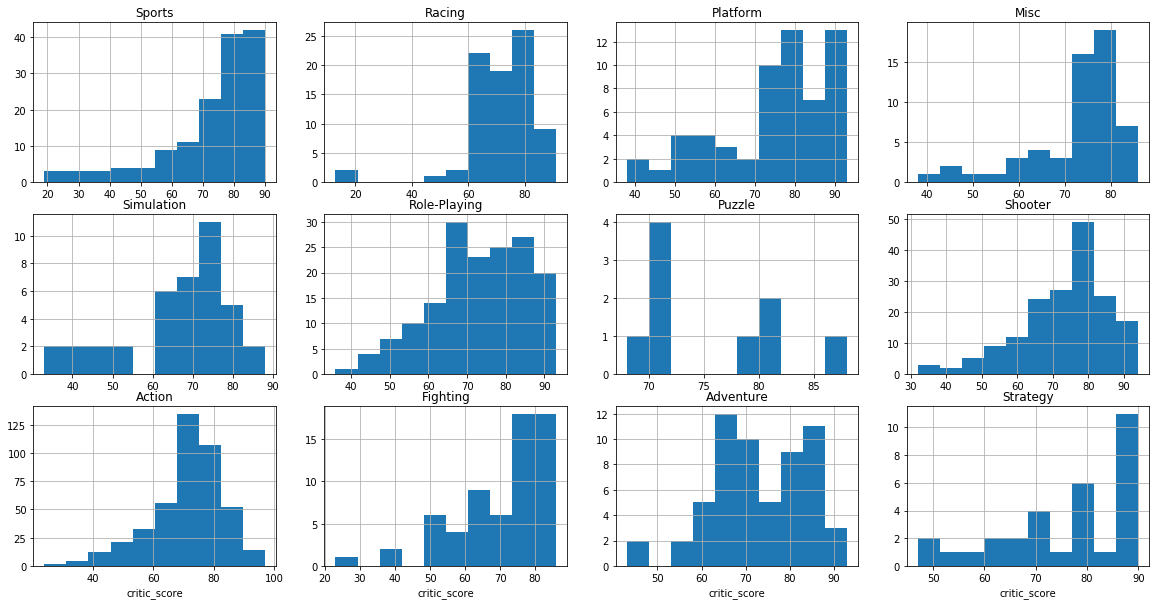

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(341)
sports['critic_score'].hist()
ax1.set_title('Sports')

ax2 = fig.add_subplot(342)
racing['critic_score'].hist()
ax2.set_title('Racing')

ax3 = fig.add_subplot(343)
platform['critic_score'].hist()
ax3.set_title('Platform')

ax4 = fig.add_subplot(344)
misc['critic_score'].hist()
ax4.set_title('Misc')

ax5 = fig.add_subplot(345)
simulation['critic_score'].hist()
ax5.set_title('Simulation')

ax6 = fig.add_subplot(346)
role_playing['critic_score'].hist()
ax6.set_title('Role-Playing')

ax7 = fig.add_subplot(347)
puzzle['critic_score'].hist()
ax7.set_title('Puzzle')

ax8 = fig.add_subplot(348)
shooter['critic_score'].hist()
ax8.set_title('Shooter')

ax9 = fig.add_subplot(349)
action['critic_score'].hist()
ax9.set_title('Action')
ax9.set_xlabel('critic_score')

ax10 = fig.add_subplot(3, 4, 10)
fighting['critic_score'].hist()
ax10.set_title('Fighting')
ax10.set_xlabel('critic_score')

ax11 = fig.add_subplot(3, 4, 11)
adventure['critic_score'].hist()
ax11.set_title('Adventure')
ax11.set_xlabel('critic_score')

ax12 = fig.add_subplot(3, 4, 12)
strategy['critic_score'].hist()
ax12.set_title('Strategy')
ax12.set_xlabel('critic_score')

Построим гистограмы для пользовательских оценок.

Text(0.5, 0, 'user_score')

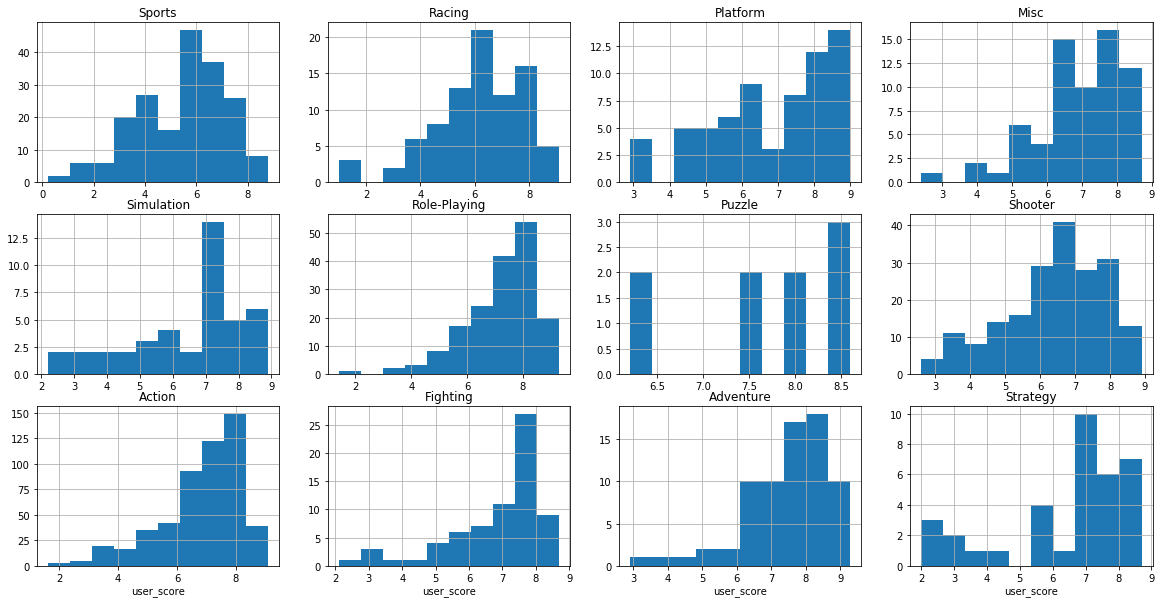

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(341)
sports['user_score'].hist()
ax1.set_title('Sports')

ax2 = fig.add_subplot(342)
racing['user_score'].hist()
ax2.set_title('Racing')

ax3 = fig.add_subplot(343)
platform['user_score'].hist()
ax3.set_title('Platform')

ax4 = fig.add_subplot(344)
misc['user_score'].hist()
ax4.set_title('Misc')

ax5 = fig.add_subplot(345)
simulation['user_score'].hist()
ax5.set_title('Simulation')

ax6 = fig.add_subplot(346)
role_playing['user_score'].hist()
ax6.set_title('Role-Playing')

ax7 = fig.add_subplot(347)
puzzle['user_score'].hist()
ax7.set_title('Puzzle')

ax8 = fig.add_subplot(348)
shooter['user_score'].hist()
ax8.set_title('Shooter')

ax9 = fig.add_subplot(349)
action['user_score'].hist()
ax9.set_title('Action')
ax9.set_xlabel('user_score')

ax10 = fig.add_subplot(3, 4, 10)
fighting['user_score'].hist()
ax10.set_title('Fighting')
ax10.set_xlabel('user_score')

ax11 = fig.add_subplot(3, 4, 11)
adventure['user_score'].hist()
ax11.set_title('Adventure')
ax11.set_xlabel('user_score')

ax12 = fig.add_subplot(3, 4, 12)
strategy['user_score'].hist()
ax12.set_title('Strategy')
ax12.set_xlabel('user_score')

**Выводы**  

По всем жанрам *средняя оценка критиков варьируется* **от 66.6 до 75.9**. Наибольшая средняя оценка критиков у игр жанра **Strategy**.  Наименьшая средняя оценка критиков у игр жанра **Simulation**. В основном в каждом из жанров значения оценок критиков имеют умеренный разброс. Наибольший разброс оценок критиков у игр с жанром  **Sports**, наименьший разброс оценок критиков у игр с жанром **Puzzle**, однако из графиков видно, что критики ставят жанру только оценки близкие к 70, 80 и чуть больше 85. Это может быть связано с тем, что большинство игр **Puzzle** одинаковые.  

По всем жанрам *средняя пользовательская оценка* варьируется **от 5.5 до 7.6**. Наибольшая средняя пользовательская оценка у игр жанра **Puzzle**.  Оценки, выставляемые этому жанру, имеют похожее распределение, как и в случае с оценками критиков.  Наименьшая средняя пользовательская оценка у игр жанра **Sports**. В основном в каждом из жанров значения оценок пользователей находятся рядом со средним значением. Наименьший разброс пользовательских оценок у игр с жанром **Puzzle**, наибольший у **Strategy**.  

Сравнивая графики пользовательских оценок и оценок критиков, можно сказать, что оценки по многим жанрам похожи.



Возможно распределения скошены влево, потому что хороших игр в целом больше чем плохих, и люди, и критики ставят больше оценок выше среднего. Другая возможная причина - люди играют в те игры, что им нравятся.

# Этап 6. Проверка гипотез

**Гипотеза 1** Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0:Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
H1:Cредние пользовательские рейтинги платформ Xbox One и PC разные.

In [ ]:
xbox_one_rating = df[(df['platform']=="XOne") & (df['user_score'].isna()==False)]['user_score']
pc_rating = df[(df['platform']=="PC") & (df['user_score'].isna()==False)]['user_score']

alpha = 0.05
results =st.ttest_ind(xbox_one_rating, pc_rating, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Наблюдаемое значение не попало в критическую зону. Следовательно, у нас нет оснований отвергнуть нулевую гипотезу.

**Гипотеза 2** Cредние пользовательские рейтинги жанров Action и Sports разные.

H0:Cредние пользовательские рейтинги  жанров Action и Sports одинаковые.  
H1:Cредние пользовательские рейтинги  жанров Action и Sports разные.

In [ ]:
#action_rating = df[df['genre']=="Action"]['user_score']
#sports_rating = df[df['genre']=="Sports"]['user_score']
action_rating = df[(df['genre']=="Action") & (df['user_score'].isna()==False)]['user_score']
sports_rating = df[(df['genre']=="Sports") & (df['user_score'].isna()==False)]['user_score']

alpha = 0.05
results =st.ttest_ind(action_rating, sports_rating)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  3.7163089460934874e-26
Отвергаем нулевую гипотезу


Наблюдаемое значение попало в критическую зону. Следовательно, у нас есть основания отвергнуть нулевую гипотезу.   
Таким образом, средние пользовательские рейтинги  жанров Action и Sports разные. 

# Этап 7. Выводы

Проведя анализ были выявлены следующие факторы:
- с каждым годом суммарные продажи и количество выпускаемых игр уменьшаются,платформа в среднем живет 10 лет;
- самые прибыльные платформы за все время PS2, X360, PS3, Wii, DS и PS;
- на данный момент лидирующими платформами являются PS4, XOne и DS;
- наблюдается положительная связь между оценками критиков и продажами, и отсутствует связь между оценками пользователей и продажами;
- больше всего производится игр в жанре Action, Sports, а также игры разного жанра;
- самыми прибыльными являются жанры Action, Sports и Shooter;

Так же были исследованы предпочтения игроков из трех регионов: Северная Америка, Европа, Япония:
- В Северной Америке самыми популярными платформами являются X360, PS4 , PS3. В Японии - 3DS, PS3, PSV;
- Топ-3 любимых жанров в Северной Америке и Европе - Action, Sports , Shooter. В Японии - Role-Playing, Action, игры разного жанра;
- В Северной Америке и Европе больше всего покупают игры "для всех", "для взрослых" и "подросткам".В Японии большинство популярных игр не имеют рейтинга.

И были проверены 2 гипотезы. Из которых следует:
- Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Cредние пользовательские рейтинги жанров Action и Sports разные. 

Таким образом, магазин должен ориентироваться на лидирующие сейчас платформы - PS4, XOne и DS. Отдавать предпочтения таким жанрам, как Action, Sports , Shooter, Role-Playing и играм разного жанра. Стоит также уделить внимание играм с высокими оценками от критиков и рейтингами "для всех", "для взрослых" и "подросткам". Данные игры имеют большие продажи относительно других.
